In [52]:
from astropy.io import fits
from astropy.modeling import models, fitting

import numpy as np
from scipy import optimize
from pathlib import Path
import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency, chi2, chisquare
from lmfit.models import GaussianModel 

In [70]:
#data_path = Path("c:/Users/ajo5182/Documents/astro/y2024-12-09/BC001_Al_FF_243K_HORI_0_0/Analysis/imaging_analysis_20241213/image_reconstruction.fits.gz")
#data_path = Path("c:/Users/ajo5182/Documents/astro/y2024-12-09/BC001_Al_FF_243K_HORI_35_0/Analysis/imaging_analysis_20241213/image_reconstruction.fits.gz")
#data_path = Path("Z:\Astro_BlackCAT\BlackCAT_Calibration_Data\LC_Calibration_Data\y2024-12-09\BC001_Al_FF_243K_HORI_10_0\Analysis\imaging_analysis_20241213\image_reconstruction.fits.gz")
#data_path = Path("Z:\Astro_BlackCAT\BlackCAT_Calibration_Data\LC_Calibration_Data\y2024-12-12\BC057_Ti_FF_233K_HORI_0_0\Analysis\imaging_analysis_20241213\image_reconstruction.fits.gz")
data_path = Path("Z:\Astro_BlackCAT\BlackCAT_Calibration_Data\LC_Calibration_Data\y2024-12-12\BC057_Ti_FF_233_HORI_0_0\Analysis\imaging_analysis_20241213\image_reconstruction.fits.gz")

d = fits.open(data_path) # open fits file

data = d[0].data # data contents of the fits file
shape =  data.shape
imPixelSize = 0.0149

y = imPixelSize * np.linspace((shape[0]-1)/-2,(shape[0]-1)/2, shape[0]) # create array from -23 deg to 23 deg, centered on zero
x = imPixelSize * np.linspace((shape[1]-1)/-2,(shape[1]-1)/2, shape[1]) # create array from -41 deg to 41 deg, centered on zero

peak = np.max(data)
peak_loc = np.unravel_index(np.argmax(data),data.shape)
window = 10

<>:5: SyntaxWarning: invalid escape sequence '\A'
<>:5: SyntaxWarning: invalid escape sequence '\A'
C:\Users\ajo5182\AppData\Local\Temp\ipykernel_1500\3655244951.py:5: SyntaxWarning: invalid escape sequence '\A'
  data_path = Path("Z:\Astro_BlackCAT\BlackCAT_Calibration_Data\LC_Calibration_Data\y2024-12-12\BC057_Ti_FF_233_HORI_0_0\Analysis\imaging_analysis_20241213\image_reconstruction.fits.gz")


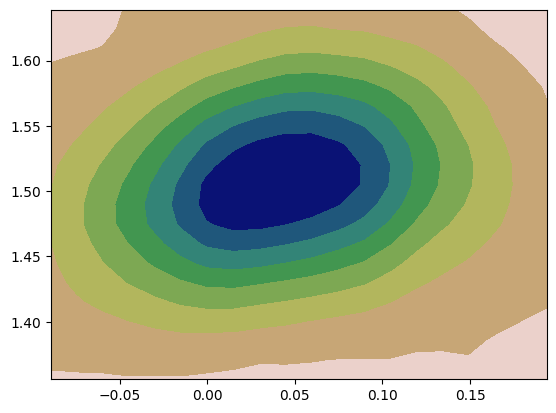

In [71]:
x_window =x[peak_loc[1]-window:peak_loc[1]+window]
y_window =y [peak_loc[0]-window:peak_loc[0]+window]
X,Y = np.meshgrid(x[peak_loc[1]-window:peak_loc[1]+window],y[peak_loc[0]-window:peak_loc[0]+window])
windowed_data = data[peak_loc[0]-window:peak_loc[0]+window, peak_loc[1]-window:peak_loc[1]+window]

plt.contourf(-X, Y, windowed_data, cmap=plt.cm.gist_earth_r)




In [28]:
import numpy as np
from astropy.modeling import models, fitting
import matplotlib.pyplot as plt

def fit_rotated_2d_gaussian(data, x=None, y=None, plot_result=False):
    """
    Fit a rotated 2D Gaussian to 2D data using Astropy's Gaussian2D model.

    Parameters:
        data : 2D numpy array
            The input data array to fit.
        x, y : 2D numpy arrays, optional
            Meshgrid coordinates corresponding to data. If None, will be auto-generated.
        plot_result : bool
            Whether to plot the original data and fit result.

    Returns:
        fitted_model : Gaussian2D
            The best-fit Gaussian2D model.
    """
    # Generate coordinate grids if not provided
    ny, nx = data.shape
    if x is None or y is None:
        y, x = np.mgrid[:ny, :nx]

    # Estimate initial parameters
    amplitude_init = np.max(data)
    x_mean_init = x[data == amplitude_init][0]
    y_mean_init = y[data == amplitude_init][0]

    # Initial guess for model
    gauss_init = models.Gaussian2D(amplitude=amplitude_init, x_mean=x_mean_init,
                                   y_mean=y_mean_init, x_stddev=.01, y_stddev=.01, theta=1)

    # Fitting with Levenberg-Marquardt algorithm
    fitter = fitting.LevMarLSQFitter()
    fitted_model = fitter(gauss_init, x, y, data)
    covariance_matrix = fitter.fit_info['param_cov']

    if plot_result:
        fit_data = fitted_model(x, y)
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        axes[0].imshow(data, origin='lower', cmap='viridis')
        axes[0].set_title("Original Data")
        axes[1].imshow(fit_data, origin='lower', cmap='viridis')
        axes[1].set_title("Fitted Gaussian")
        plt.tight_layout()
        plt.show()

    return fitted_model,covariance_matrix


# Generate synthetic Gaussian data
def generate_rotated_gaussian_data(amp,xmean,ymean,xstd,ystd,theta):
    y, x = np.mgrid[0:100, 0:100]
    model = models.Gaussian2D(amplitude=3, x_mean=50, y_mean=50,
                              x_stddev=10, y_stddev=20, theta=np.pi/4)
    data = model(x, y) + 0.1 * np.random.normal(size=x.shape)
    return data, x, y

c:\Users\ajo5182\AppData\Local\miniconda3\envs\xhcd\Lib\site-packages\uncertainties\core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")


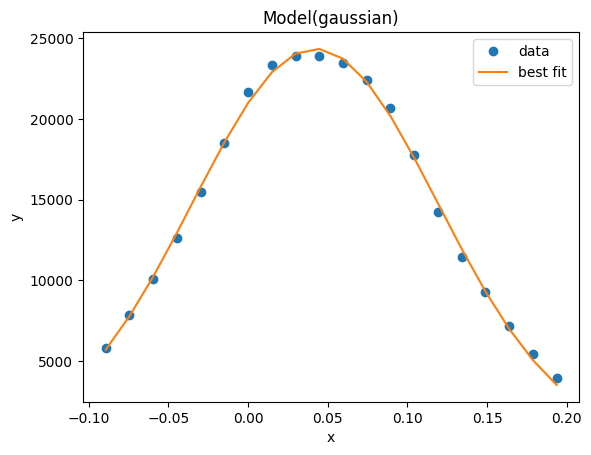

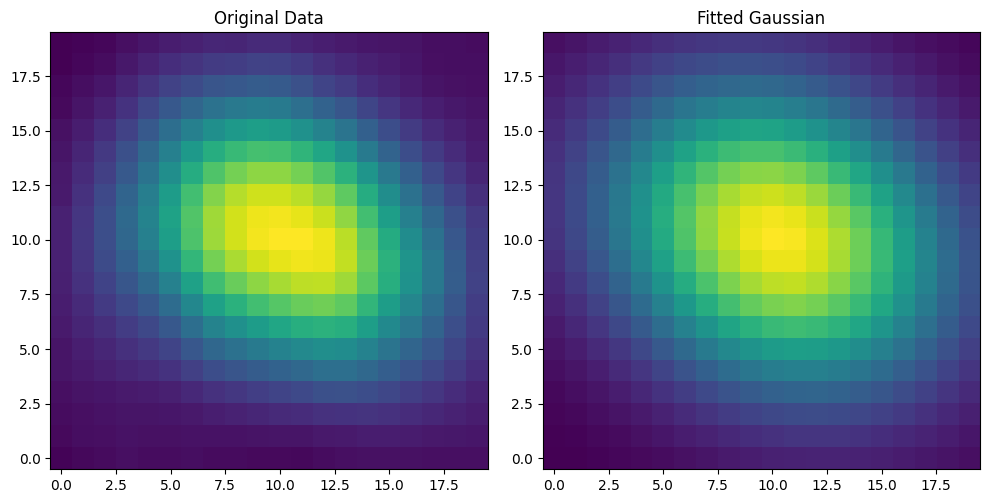

Amplitude: 23686.701821510804
x_mean: 0.04120003719449545
y_mean: 1.5062044823090657
x_stddev: 0.08366941571485811
y_stddev: 0.06726059662239661
theta (radians): 0.47201549761591216


('amplitude', 'x_mean', 'y_mean', 'x_stddev', 'y_stddev', 'theta')

In [72]:
def fit_rotated_2d_gaussian(data, x=None, y=None, plot_result=False):
    """
    Fit a rotated 2D Gaussian to 2D data using Astropy's Gaussian2D model.

    Parameters:
        data : 2D numpy array
            The input data array to fit.
        x, y : 2D numpy arrays, optional
            Meshgrid coordinates corresponding to data. If None, will be auto-generated.
        plot_result : bool
            Whether to plot the original data and fit result.

    Returns:
        fitted_model : Gaussian2D
            The best-fit Gaussian2D model.
    """
    # Generate coordinate grids if not provided
    ny, nx = data.shape
    if x is None or y is None:
        y, x = np.mgrid[:ny, :nx]

    # Estimate initial parameters
    amplitude_init = np.max(data)
    x_mean_init = x[data == amplitude_init][0]
    y_mean_init = y[data == amplitude_init][0]

    xcut =x[:][int(ny/2)]
    guessModel = GaussianModel()
    params = guessModel.guess(xcut, data[:][int(ny/2)])
    guessResult = guessModel.fit(data[:][int(ny/2)], params,x = xcut)
    guessResult.plot_fit()

    # Initial guess for model
    gauss_init = models.Gaussian2D(amplitude=amplitude_init, x_mean=x_mean_init,
                                   y_mean=y_mean_init, x_stddev= .08, y_stddev=.08, theta=.08)

    # Fitting with Levenberg-Marquardt algorithm
    fitter = fitting.LevMarLSQFitter()
    fitted_model = fitter(gauss_init, x, y, data)
    covariance_matrix = fitter.fit_info['param_cov']

    if plot_result:
        fit_data = fitted_model(x, y)
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        axes[0].imshow(data, origin='lower', cmap='viridis')
        axes[0].set_title("Original Data")
        axes[1].imshow(fit_data, origin='lower', cmap='viridis')
        axes[1].set_title("Fitted Gaussian")
        plt.tight_layout()
        plt.show()

    return fitted_model,covariance_matrix



fitted,cov = fit_rotated_2d_gaussian(windowed_data, -X, Y, plot_result=True)

# Print the fitted parameters
print(f"Amplitude: {fitted.amplitude.value}")
print(f"x_mean: {fitted.x_mean.value}")
print(f"y_mean: {fitted.y_mean.value}")
print(f"x_stddev: {fitted.x_stddev.value}")
print(f"y_stddev: {fitted.y_stddev.value}")
print(f"theta (radians): {fitted.theta.value}")
fitted.param_names



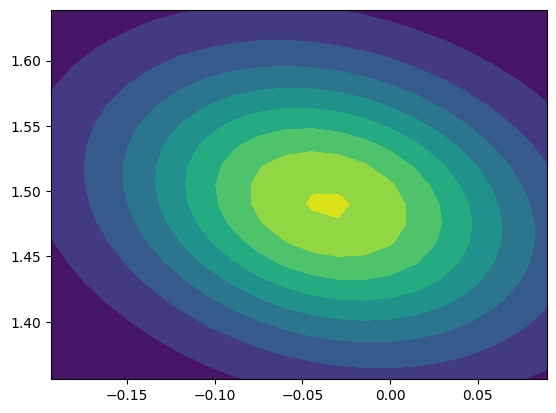

In [73]:
def generate_rotated_gaussian_data(x,y,amp,xmean,ymean,xstd, ystd,theta):
    #y, x = np.mgrid[0:100, 0:100]
    model = models.Gaussian2D(amp,xmean,ymean,xstd, ystd,theta)
    data = model(x, y)
    return data

test = generate_rotated_gaussian_data(X,Y, 16232, -0.035,1.49,0.088,0.069,8.87)
plt.contourf(X,Y,test)
win_0 = np.where(windowed_data<0,0,windowed_data)
test = np.where(test<0,0,test)
dat = [win_0, test]

#stat,p,dof,expected = chi2_contingency(dat)

#print(stat,p,dof,expected)
